# MOwNiT – interpolacja Hermite'a

__Przygotował:__
__Szymon Budziak__

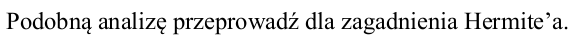

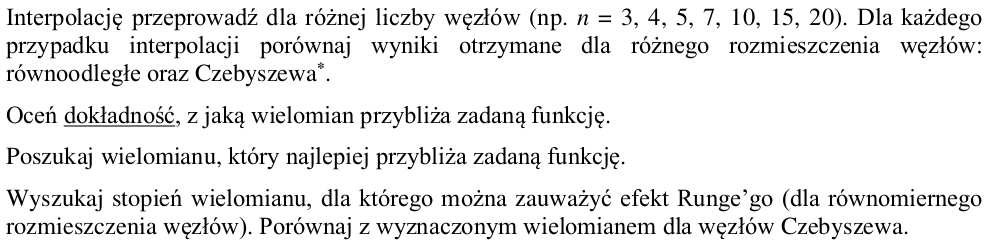

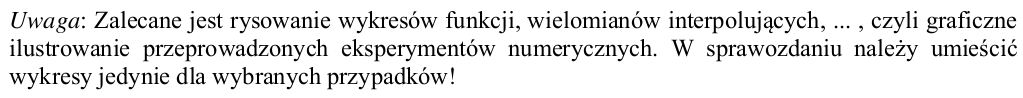

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from math import factorial

In [2]:
def even_distribution(start, stop, n):
    return np.linspace(start, stop, num=n)

In [3]:
def chebyshev_distribution(start, stop, n):
    chebyt_roots = []
    for k in range(1, n+1):
        cosin = np.cos((2*k-1)/(2*n) * np.pi)
        curr_result = 0.5*(start+stop) + 0.5*(stop-start)*cosin
        chebyt_roots.append(curr_result)
    return np.array(chebyt_roots)

## Function to interpolate

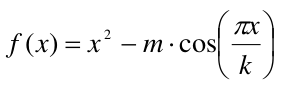

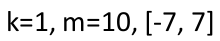

In [4]:
def func(x):
    k = 1
    m = 10
    y = x**2 - m*np.cos((np.pi*x) / k)
    return y

In [5]:
def deriv1_func(x):
    k = 1
    m = 10
    y = 2*x + (m*np.pi*np.sin((np.pi*x) / k))/k
    return y

**Plot of the function**

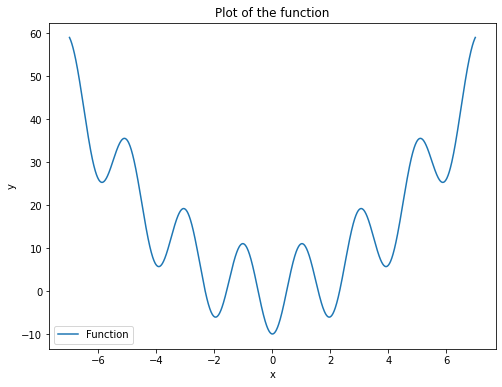

In [6]:
plt.figure(figsize=(8,6))
X = np.arange(-7, 7+0.01, 0.01)
plt.plot(X, func(X), label = "Function")
plt.title(f"Plot of the function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Visualization

In [7]:
def visualize(x, y, function, n, name):
    plt.figure(figsize=(8,6))
    plt.scatter(x, y, label="data", color="red")
    X = np.arange(-7, 7+0.01, 0.01)
    plt.plot(X, func(X), label = "Function",color="red")
    if name == "CubicHermiteSpline":
        deriv_x = deriv1_func(x)
        f = function(x, y, deriv_x)
        plt.plot(X, f(X), label = "CubicHermiteSplin", color="blue")
    elif name == "hermite_interpolation":
        deriv_x = deriv1_func(x)
        p_and_deriv = list(zip(x, deriv_x))
        plt.plot(X, function(p_and_deriv, X), label = "own hermite interpolation", color="blue")
    plt.title(f"Hermite Polynomial Interpolation on {n} nodes")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

## Errors

In [8]:
def max_error(Y1, Y2):
    return max([abs(Y1[i] - Y2[i]) for i in range(len(Y1))])

In [9]:
def sum_square_error(Y1, Y2):
    return sum([(Y1[i] - Y2[i])**2 for i in range(len(Y1))])

## Hermite interpolation

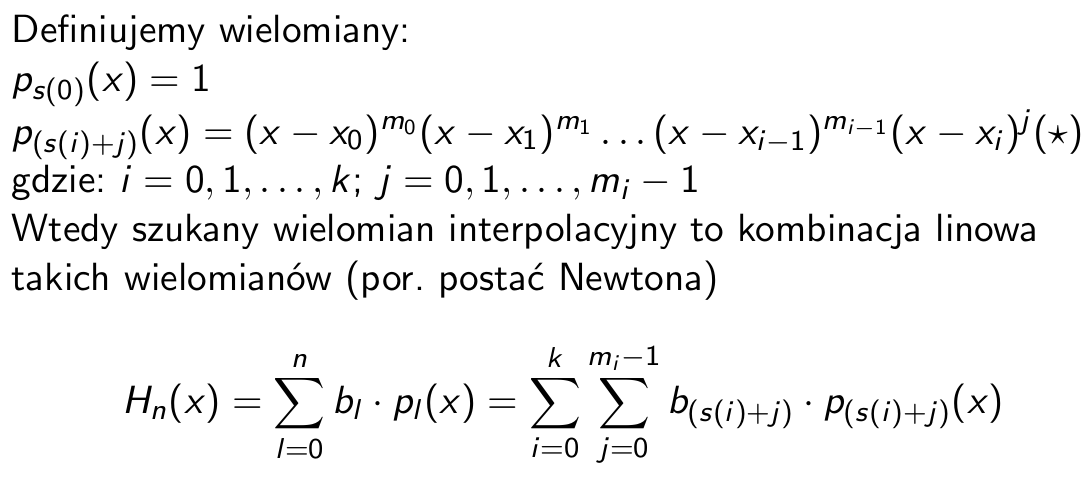

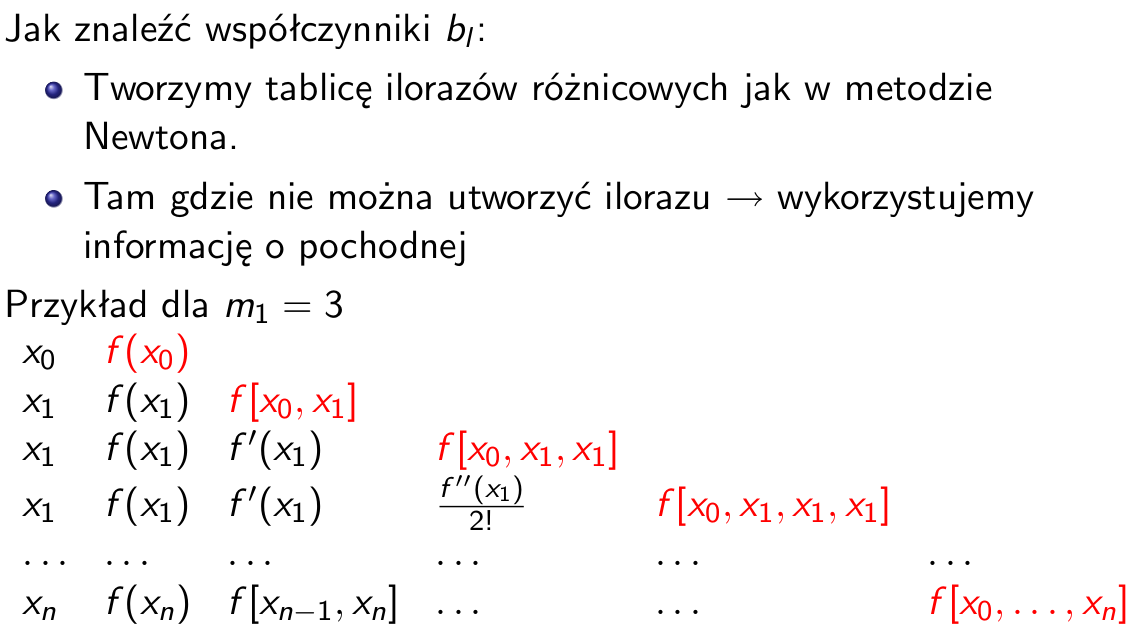

### SciPy interpolate.CubicHermiteSpline

In [10]:
def even_hermite_scipy(start, stop, n):
    # even distribution
    even_x = even_distribution(start, stop, n)
    even_y = func(even_x)
    visualize(even_x, even_y, interpolate.CubicHermiteSpline, n, "CubicHermiteSpline")

In [11]:
def chebyt_hermite_scipy(start, stop, n):
    # chebyshev distribution
    chebyt_x = chebyshev_distribution(start, stop, n)
    chebyt_y = func(chebyt_x)
    chebyt_x.sort()
    visualize(chebyt_x, chebyt_y, interpolate.CubicHermiteSpline, n, "CubicHermiteSpline")

**n = 3**

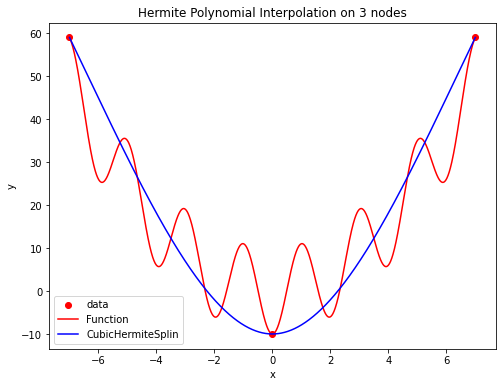

In [12]:
even_hermite_scipy(-7, 7, 3)

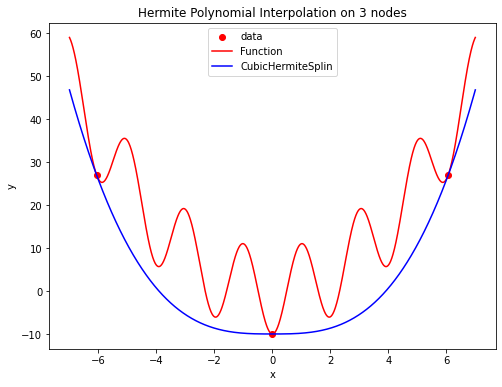

In [13]:
chebyt_hermite_scipy(-7, 7, 3)

**n = 5**

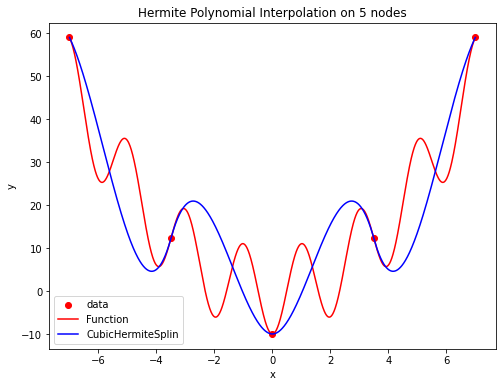

In [14]:
even_hermite_scipy(-7, 7, 5)

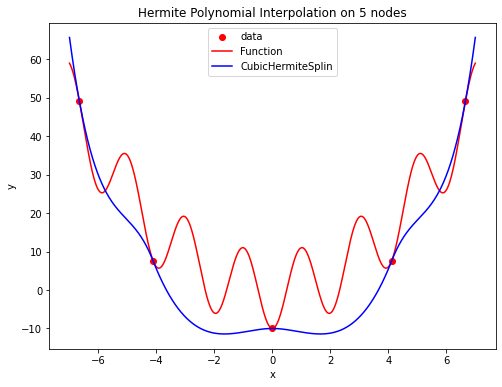

In [15]:
chebyt_hermite_scipy(-7, 7, 5)

**n = 10**

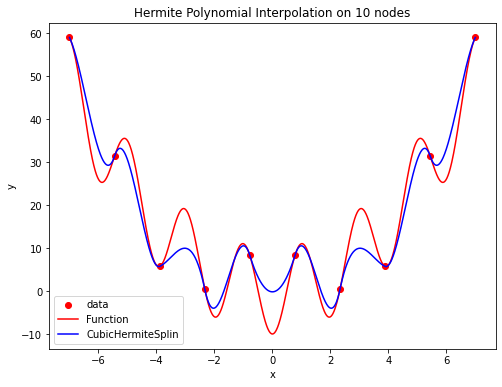

In [16]:
even_hermite_scipy(-7, 7, 10)

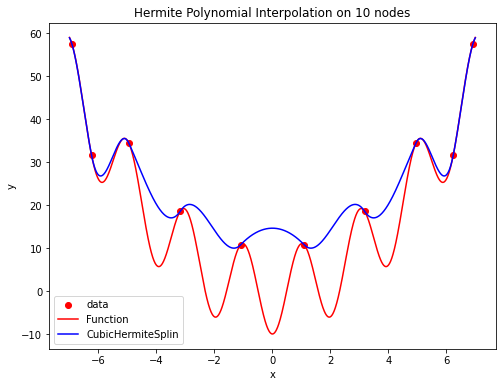

In [17]:
chebyt_hermite_scipy(-7, 7, 10)

**n = 20**

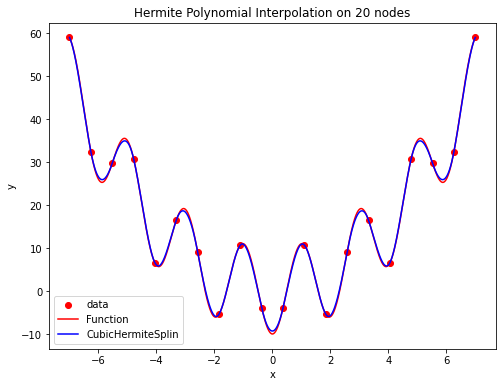

In [18]:
even_hermite_scipy(-7, 7, 20)

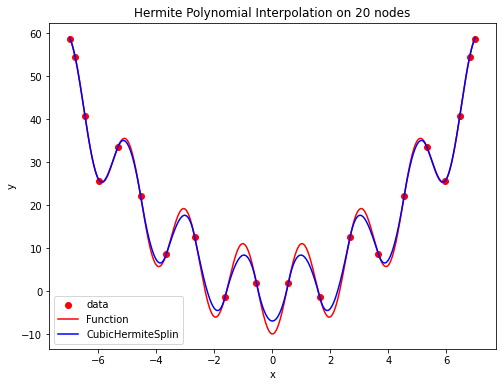

In [19]:
chebyt_hermite_scipy(-7, 7, 20)

### Hermite interpolation own implementation

In [20]:
def hermite_interpolation(points, x):
    # points is a list of tuples [(x1, x1'), (x2, x2')...]
    n = sum([len(p) for p in points])
    b_matrix = [[None for _ in range(n)] for _ in range(n)]
    
    pts_and_idx = []
    for idx, row in enumerate(points):
        for _ in range(len(row)):
            pts_and_idx.append((row[0], idx))
            
    # building rows with first collumn that is only the function
    row = 0
    for i in range(len(points)):
        for _ in range(len(points[i])):
            b_matrix[row][0] = func(points[i][0])
            row += 1
    
    # building rows with derivatives
    for i in range(1, n):
        for j in range(1, i+1):
            first_idx = pts_and_idx[i][1]
            second_idx = pts_and_idx[i-j][1]
            if points[first_idx] == points[second_idx] and j < len(points[first_idx]):
                b_matrix[i][j] = points[first_idx][j] / factorial(j)
            else:
                first_val = pts_and_idx[i][0]
                second_val = pts_and_idx[i-j][0]
                b_matrix[i][j] = (b_matrix[i][j-1] - b_matrix[i-1][j-1]) / (first_val-second_val)
            
    return sum([b_matrix[i][i] * p(points, x, i) for i in range(n)])

def p(points, x, i):
    if i == 0:
        return 1
    idx = j = 0
    result = 1
    while j < i:
        for _ in range(len(points[idx])):
            if i <= j:
                break
            result *= (x  - points[idx][0])
            j+= 1
        idx += 1
    return result

In [21]:
def even_hermite_own_implementation(start, stop, n):
    # even distribution
    even_x = even_distribution(start, stop, n)
    even_y = func(even_x)
    deriv_even_x = deriv1_func(even_x)
    p_and_deriv = list(zip(even_x, deriv_even_x))
    visualize(even_x, even_y, hermite_interpolation, n, "hermite_interpolation")

In [22]:
def chebyt_hermite_own_implementation(start, stop, n):
    # chebyshev distribution
    chebyt_x = chebyshev_distribution(start, stop, n)
    chebyt_y = func(chebyt_x)
    deriv_chebyt_x = deriv1_func(chebyt_x)
    p_and_deriv = list(zip(chebyt_x, deriv_chebyt_x))
    visualize(chebyt_x, chebyt_y, hermite_interpolation, n, "hermite_interpolation")

__n = 4__

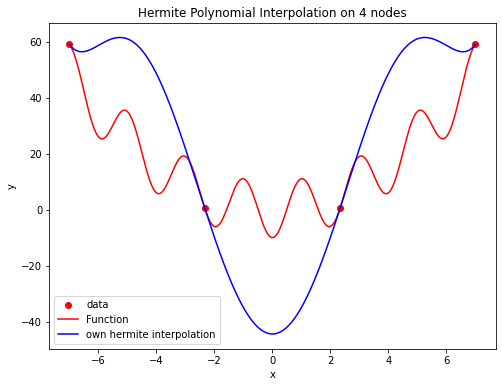

In [23]:
even_hermite_own_implementation(-7, 7, 4)

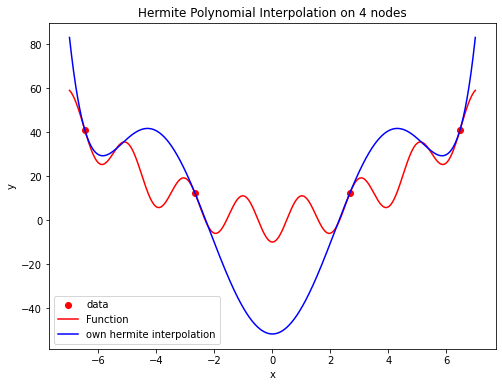

In [24]:
chebyt_hermite_own_implementation(-7, 7, 4)

__n = 7__

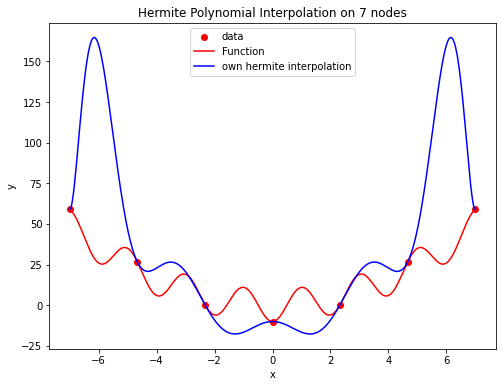

In [25]:
even_hermite_own_implementation(-7, 7, 7)

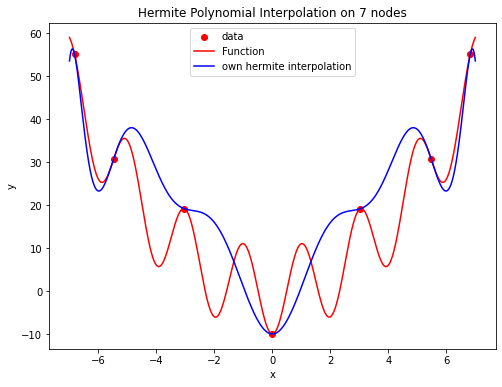

In [26]:
chebyt_hermite_own_implementation(-7, 7, 7)

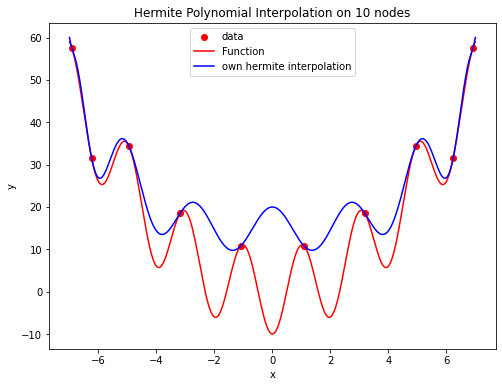

In [27]:
chebyt_hermite_own_implementation(-7, 7, 10)

__n = 15__

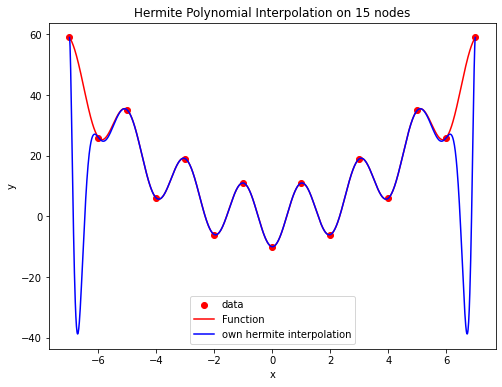

In [28]:
even_hermite_own_implementation(-7, 7, 15)

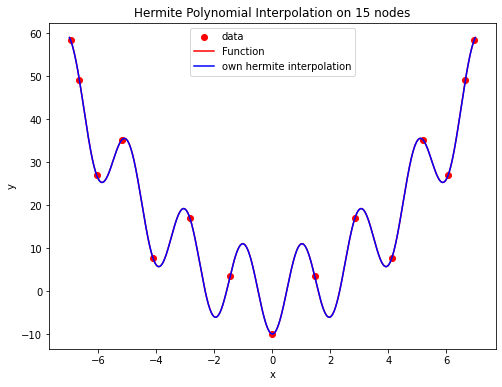

In [29]:
chebyt_hermite_own_implementation(-7, 7, 15)

__n = 20__

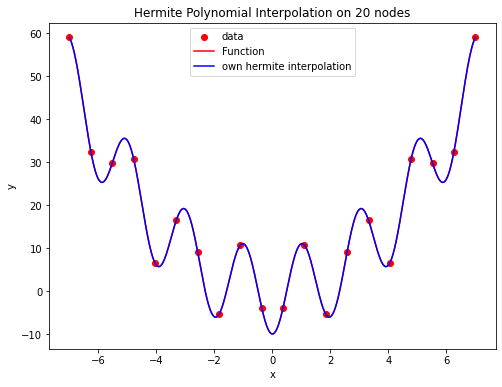

In [30]:
even_hermite_own_implementation(-7, 7, 20)

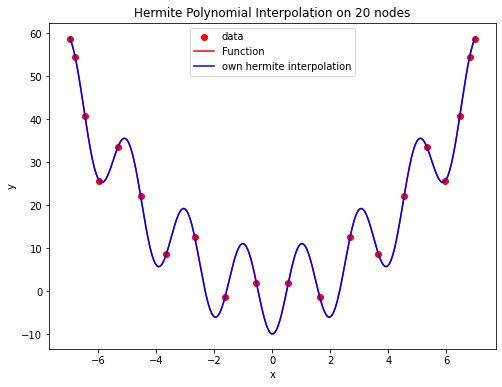

In [31]:
chebyt_hermite_own_implementation(-7, 7, 20)

## Error for Hermite interpolation

In [32]:
def calculate_error(start, stop, function):
    nodes = [3, 4, 5, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80]
    # max error
    even_max_error_list = [None for _ in range(len(nodes))]
    chebyt_max_error_list = [None for _ in range(len(nodes))]
    # sum square error
    even_sum_sq_error_list = [None for _ in range(len(nodes))]
    chebyt_sum_sq_error_list = [None for _ in range(len(nodes))]

    df_result = pd.DataFrame()
    X = np.linspace(start, stop, 1000)
    func_val = func(X)
    for idx, n in enumerate(nodes):
        # even
        even_x = even_distribution(start, stop, n)
        even_deriv_x = deriv1_func(even_x)
        even_p_and_deriv = list(zip(even_x, even_deriv_x))
        even_inter = function(even_p_and_deriv, X)

        # chebyt
        chebyt_x = chebyshev_distribution(start, stop, n)
        chebyt_deriv_x = deriv1_func(chebyt_x)
        chebyt_p_and_deriv = list(zip(chebyt_x, chebyt_deriv_x))
        chebyt_inter = function(chebyt_p_and_deriv, X)

        even_max_error_list[idx] = max_error(even_inter, func_val)
        chebyt_max_error_list[idx] = max_error(chebyt_inter, func_val)
        even_sum_sq_error_list[idx] = sum_square_error(even_inter, func_val)
        chebyt_sum_sq_error_list[idx] = sum_square_error(chebyt_inter, func_val)
    return pd.DataFrame(data={"n": nodes,
                              "even max error": even_max_error_list,
                              "chebyt max error": chebyt_max_error_list,
                              "even sum square error": even_sum_sq_error_list,
                              "chebyt sum square error": chebyt_sum_sq_error_list})

In [33]:
hermite_df = calculate_error(-7, 7, hermite_interpolation)
hermite_df

,n,even max error,chebyt max error,even sum square error,chebyt sum square error
0,3,1.920398e+01,2.386607e+01,9.906614e+04,1.872177e+05
1,4,4.716426e+01,5.290641e+01,8.443497e+05,6.420230e+05
2,5,6.158387e+01,2.915608e+01,6.877661e+05,1.959717e+05
3,7,1.364082e+02,2.244161e+01,2.437949e+06,1.204666e+05
4,8,1.999995e+01,4.741173e+01,1.498500e+05,2.158941e+05
5,9,6.821063e+02,3.770422e+01,4.016778e+07,1.822692e+05
6,10,1.307890e+03,2.997740e+01,1.260736e+08,1.078072e+05
7,15,9.049603e+01,5.393895e-02,3.521028e+05,7.424442e-01
8,20,6.102519e-02,2.919456e-03,1.107973e-01,5.104143e-05
9,25,6.015772e-03,5.400403e-02,1.657189e-04,1.302108e-02


In [34]:
even_max_err_idx = hermite_df["even max error"].idxmin()
print(even_max_err_idx)
chebyt_max_err_idx = hermite_df["chebyt max error"].idxmin()
print(chebyt_max_err_idx)
even_sum_square_idx = hermite_df["even sum square error"].idxmin()
print(even_sum_square_idx)
chebyt_sum_square_idx = hermite_df["chebyt sum square error"].idxmin()
print(chebyt_sum_square_idx)

9
8
9
8


Dzięki max error oraz sum square error możemy znaleźć najlepszy wielomian (jego stopień) który interpoluje naszą funkcję. W naszym przypadku jest to wielomian stopnia n = 20.

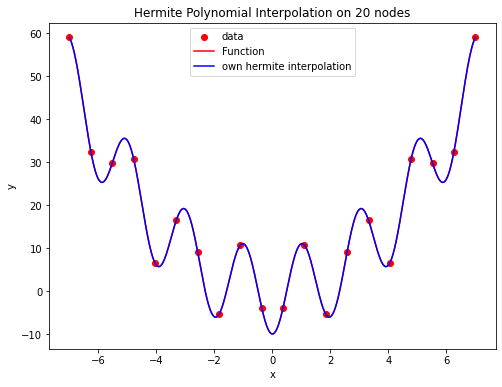

In [35]:
even_hermite_own_implementation(-7, 7, 20)

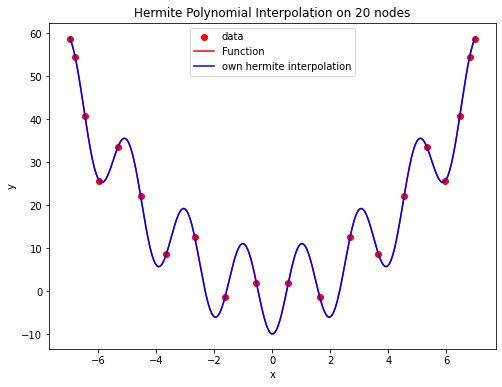

In [36]:
chebyt_hermite_own_implementation(-7, 7, 20)

## Efekt Rungego

Efekt Rungego możemy zaobserwować już dla liczby węzłów równej 7 przy rozmieszczeniu równomiernym i przy własnej implementacji (przy implementacji z biblioteki scipy efekt Rungego nie występuje tak szybko). Możemy to zaobserwować na wykresach oraz na obliczonych błędach. Zobaczmy czy wcześniej (węzeł 6) też występuje ten efekt.

__n = 6 - OK__

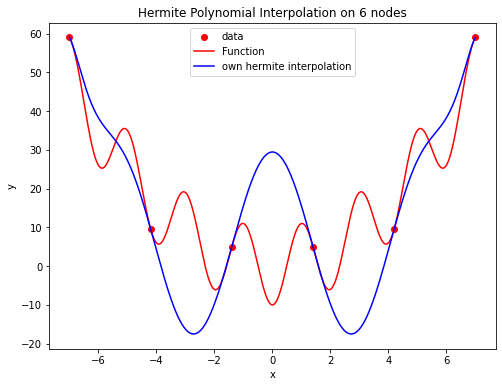

In [37]:
even_hermite_own_implementation(-7, 7, 6)

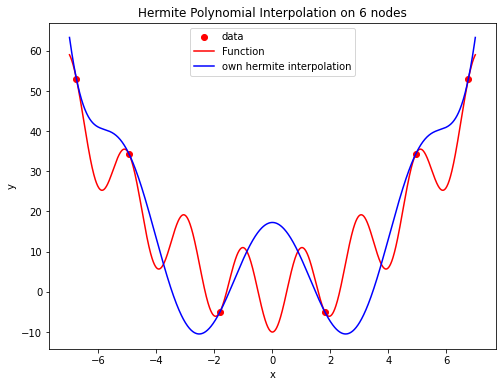

In [38]:
chebyt_hermite_own_implementation(-7, 7, 6)

__n = 7 - efekt Rungego__

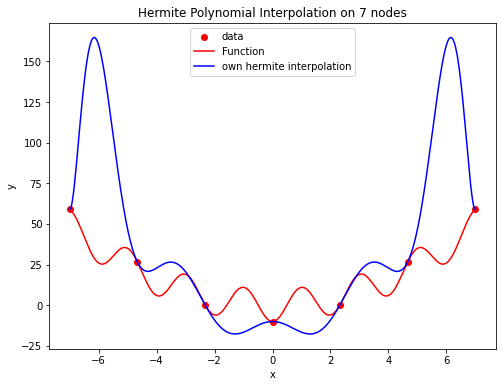

In [39]:
even_hermite_own_implementation(-7, 7, 7)

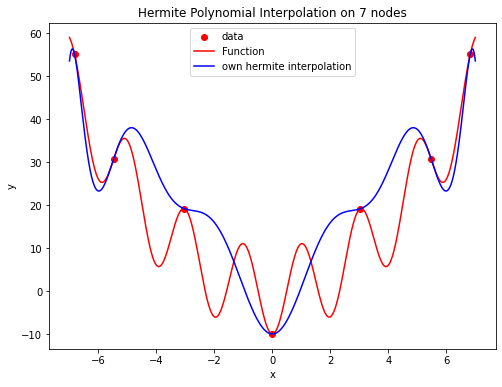

In [40]:
chebyt_hermite_own_implementation(-7, 7, 7)

__n = 9 - efekt Rungego__

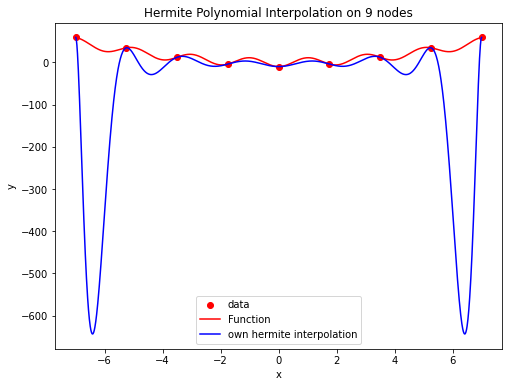

In [41]:
even_hermite_own_implementation(-7, 7, 9)

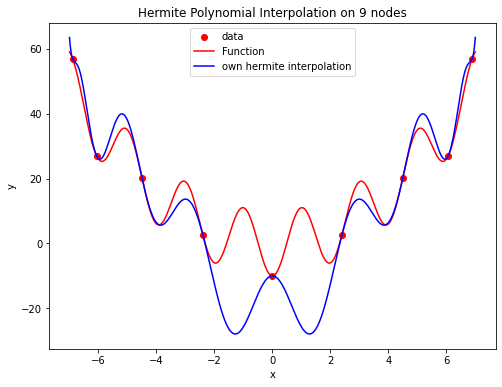

In [42]:
chebyt_hermite_own_implementation(-7, 7, 9)

__Dla porównania te same liczby węzłów oraz rozmieszczenie równomierne ale implementacja biblioteczna scipy.__

__n = 6 - OK__

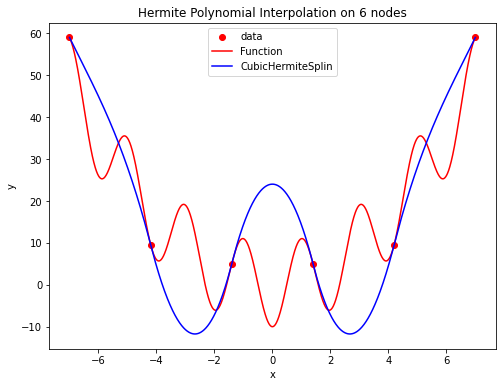

In [43]:
even_hermite_scipy(-7, 7, 6)

__n = 7 - OK__

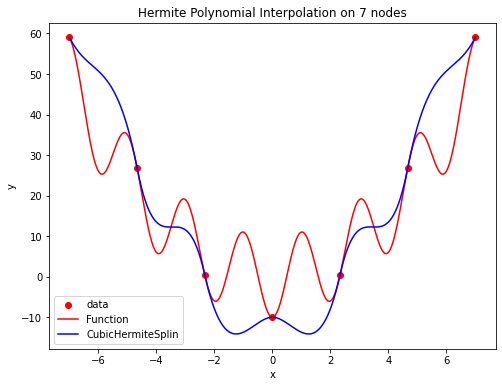

In [44]:
even_hermite_scipy(-7, 7, 7)

__n = 9 - OK__

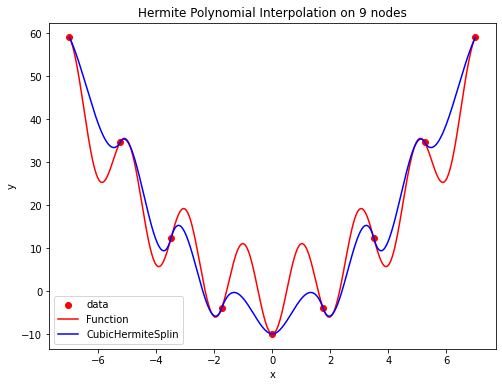

In [45]:
even_hermite_scipy(-7, 7, 9)